## Problem Statement
#### Life expectancy is a key indicator of a country's health and development. Various factors, such as healthcare access, economic conditions, and immunization, influence life expectancy across different nations. However, the impact of these factors is not always clear. This project aims to analyze how social, economic, and health-related factors contribute to life expectancy and provide insights for policymakers to improve public health outcomes.

## Project Objectives
#### 1. Data Analysis & Preprocessing:
#### - Clean and preprocess the dataset to handle missing values and inconsistencies.
#### 2. Exploratory Data Analysis (EDA):
#### - Identify patterns, correlations, and trends in life expectancy.
#### - Compare developed vs. developing countries.
#### 3. Feature Importance & Modeling:
#### - Use statistical and machine learning models to determine key predictors of life expectancy.
#### - Evaluate model performance using metrics like RMSE and R².
#### 4. Insights & Recommendations:
#### - Provide actionable insights for policymakers to improve life expectancy.
#### - Suggest healthcare and economic policies for lower life expectancy countries.

##  Research Questions
#### 1. What are the most significant factors affecting life expectancy across countries?
#### 2. How do economic indicators like GDP and healthcare expenditure impact life expectancy?
#### 3. Does immunization coverage (Hepatitis B, Polio, Diphtheria) play a significant role in improving life expectancy?
#### 4. How do mortality rates (Infant mortality, Adult mortality) influence life expectancy?
#### 5. What is the relationship between life expectancy and lifestyle factors such as alcohol consumption, nutrition, and schooling?
#### 6. Do developed countries have a significantly higher life expectancy than developing countries?

In [3]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\Vaibhav Joshi\Downloads\Life Expectancy Data.csv')

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.shape

(2938, 22)

## Data Cleaning

In [7]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
(368/len(df))*100

12.525527569775358

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.dropna(subset = ['Life expectancy','Adult Mortality'], inplace = True)

In [12]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [13]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

<Axes: xlabel='Alcohol', ylabel='Count'>

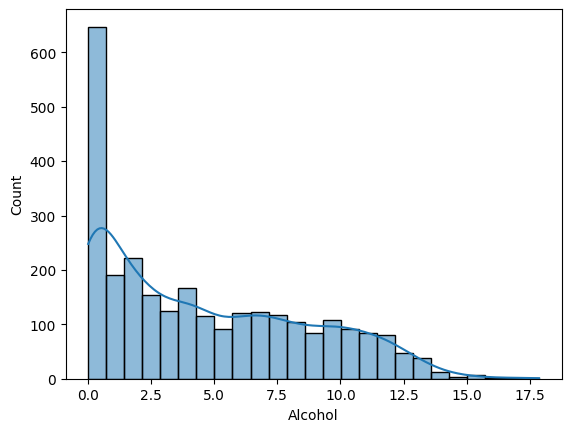

In [14]:
sns.histplot(df['Alcohol'], bins=25, kde=True)   

#### The data in the Alcohol column exhibits right-skewed distribution. To maintain the integrity of the dataset and reduce the impact of outliers, we will use the median to impute the missing values, as it is a more robust measure of central tendency in such cases.

In [15]:
df['Alcohol filled'] = df.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(x.median()))
df['Alcohol filled'] = df.groupby('Country')['Alcohol'].transform(lambda x: x.ffill().bfill())
df = df.dropna(subset=['Alcohol filled'])

#### To handle missing data, I initially used the median for imputation, considering the skewness of the data. Despite this, some missing values remained. To further address this, we applied forward and backward filling within each country to maintain data consistency. After these steps, any remaining missing values were removed to ensure data integrity.

In [16]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                        538
Measles                              0
BMI                                 16
under-five deaths                    0
Polio                                8
Total expenditure                  213
Diphtheria                           8
HIV/AIDS                             0
GDP                                435
Population                         644
thinness  1-19 years                16
thinness 5-9 years                  16
Income composition of resources    160
Schooling                          160
Alcohol filled                       0
dtype: int64

<Axes: xlabel='Hepatitis B', ylabel='Count'>

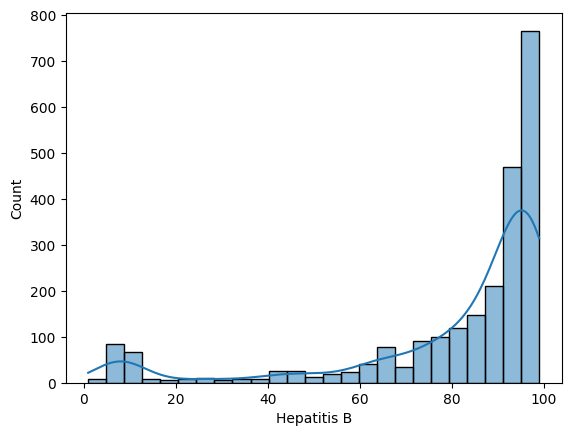

In [17]:
sns.histplot(df['Hepatitis B'], bins=25, kde=True) 

#### The data in the Hepatitis B column exhibits left-skewed distribution. To maintain the integrity of the dataset and reduce the impact of outliers, we will use the median to impute the missing values, as it is a more robust measure of central tendency in such cases.

In [18]:
df['Hepatitis B filled'] = df.groupby('Country')['Hepatitis B'].transform(lambda x: x.fillna(x.median()))
df['Hepatitis B filled'] = df.groupby('Country')['Hepatitis B'].transform(lambda x: x.ffill().bfill())
df = df.dropna(subset=['Hepatitis B filled'])

In [20]:
df = df.dropna(subset = ['Polio'])

<Axes: xlabel='Total expenditure', ylabel='Count'>

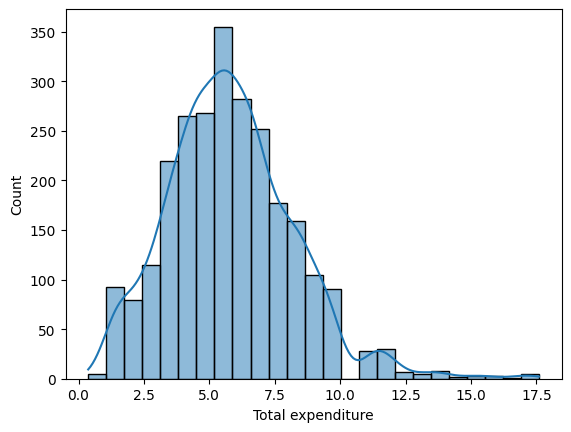

In [21]:
sns.histplot(df['Total expenditure'], bins=25, kde=True) 

In [22]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            169
percentage expenditure               0
Hepatitis B                        386
Measles                              0
BMI                                 16
under-five deaths                    0
Polio                                0
Total expenditure                  204
Diphtheria                           0
HIV/AIDS                             0
GDP                                419
Population                         628
thinness  1-19 years                16
thinness 5-9 years                  16
Income composition of resources    144
Schooling                          144
Alcohol filled                       0
Hepatitis B filled                   0
dtype: int64

<Axes: xlabel='GDP', ylabel='Count'>

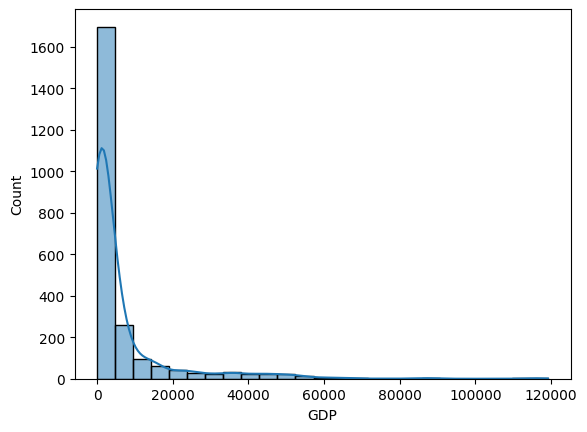

In [25]:
sns.histplot(df['GDP'], kde = True, bins = 25)

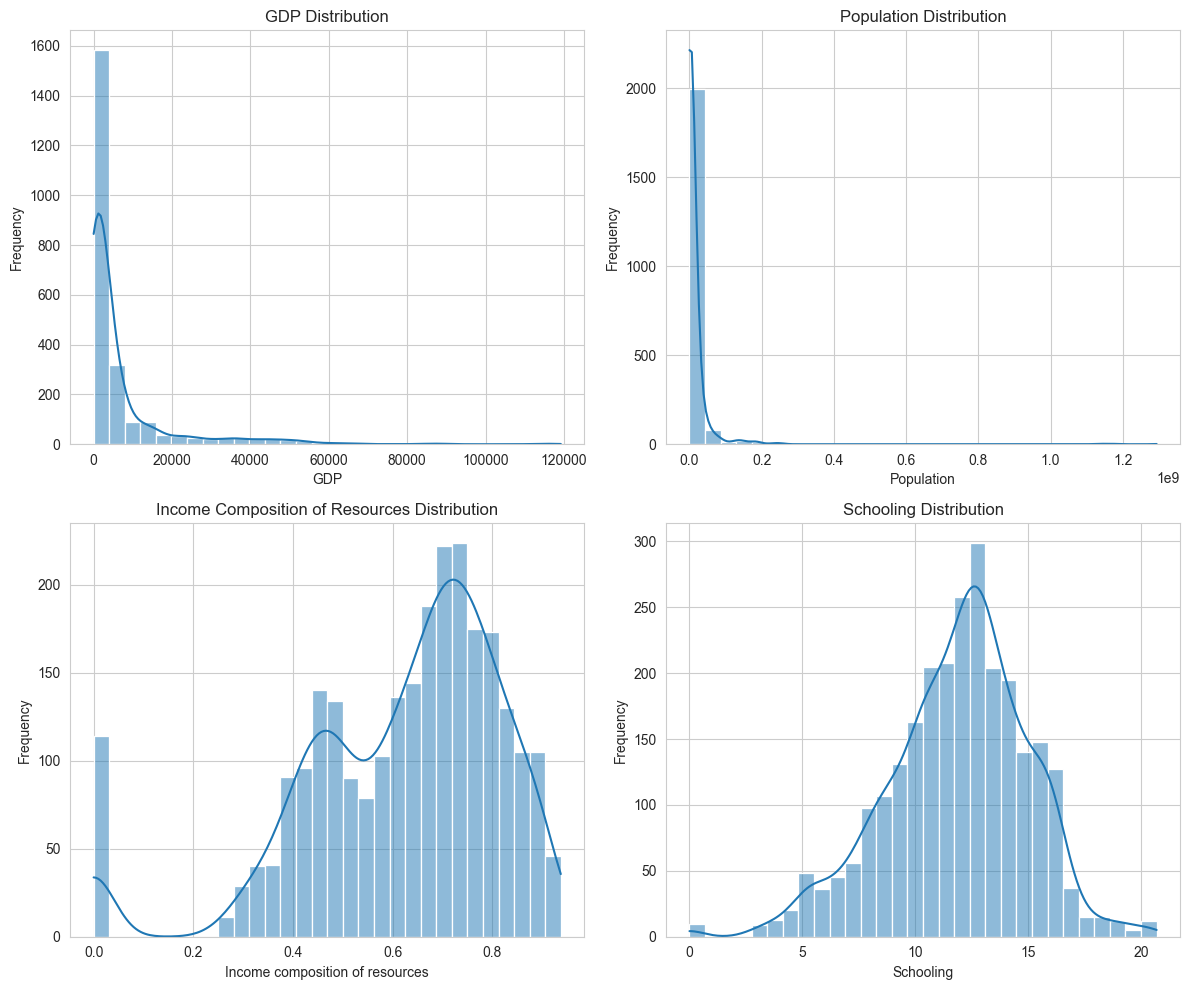

In [26]:
sns.set_style("whitegrid")

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of columns to plot
columns = ["GDP", "Population", "Income composition of resources", "Schooling"]
titles = ["GDP Distribution", "Population Distribution", 
          "Income Composition of Resources Distribution", "Schooling Distribution"]

# Loop through columns and plot histograms
for i, ax in enumerate(axes.flat):
    sns.histplot(df[columns[i]], bins=30, kde=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(columns[i])
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [27]:
df['GDP Filled'] = df.groupby('Country')['GDP'].transform(lambda x: x.fillna(x.median()))
df['GDP Filled'] = df.groupby('Country')['GDP'].transform(lambda x: x.ffill().bfill())
df = df.dropna(subset=['GDP Filled'])

df['Population Filled'] = df.groupby('Country')['Population'].transform(lambda x: x.fillna(x.median()))
df['Population Filled'] = df.groupby('Country')['Population'].transform(lambda x: x.ffill().bfill())
df = df.dropna(subset = ['Population Filled'])

df['Income composition of resources Filled'] = df.groupby('Country')['Income composition of resources'].transform(lambda x: x.fillna(x.median()))
df['Income composition of resources Filled'] = df.groupby('Country')['Income composition of resources'].transform(lambda x: x.ffill().bfill())

In [28]:
columns_to_drop = ['Alcohol', 'Hepatitis B', 'Total expenditure', 'GDP', 'Population', 'Income composition of resources']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')  


## Exploratory Data Analysis (EDA)

In [29]:

df['Population Filled'] = df['Population Filled'].round().astype('Int64')

In [30]:
df.dtypes

Country                                    object
Year                                        int64
Status                                     object
Life expectancy                           float64
Adult Mortality                           float64
infant deaths                               int64
Alcohol                                   float64
percentage expenditure                    float64
Hepatitis B                               float64
Measles                                     int64
BMI                                       float64
under-five deaths                           int64
Polio                                     float64
Total expenditure                         float64
Diphtheria                                float64
HIV/AIDS                                  float64
GDP                                       float64
Population                                float64
thinness  1-19 years                      float64
thinness 5-9 years                        float64


In [31]:
pd.set_option('display.max_columns', None)
df.describe().style.background_gradient(cmap='Reds')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Alcohol filled,Hepatitis B filled,GDP Filled,Population Filled,Income composition of resources Filled
count,2136.000000,2136.000000,2136.000000,2136.000000,2004.000000,2136.000000,1805.000000,2136.000000,2120.000000,2136.000000,2136.000000,2001.000000,2136.000000,2136.000000,2118.000000,2132.000000,2120.000000,2120.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,2007.520599,68.086189,174.809925,36.249532,4.428493,637.713755,79.208310,2670.794944,36.666651,50.350655,80.515449,5.885552,80.642322,2.166994,5426.773191,13505678.984728,5.108821,5.178538,0.607593,11.679307,4.340445,74.316948,5386.753158,13481225.407772,0.607593
std,4.605927,9.601905,129.689687,135.974991,3.971200,1707.977264,25.535242,11891.436896,19.845707,184.826122,24.236592,2.290990,24.241667,5.817342,11397.354276,63106495.321071,4.713726,4.807461,0.201351,3.180281,3.992418,28.719987,11357.637565,63049880.224064,0.201351
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,34.000000,0.100000,0.100000,0.000000,0.000000,0.010000,2.000000,1.681350,34.000000,0.000000
25%,2004.000000,61.975000,76.000000,1.000000,0.830000,20.138149,74.000000,0.000000,18.400000,1.000000,75.000000,4.340000,76.000000,0.100000,400.899289,214189.750000,1.600000,1.600000,0.475750,9.775000,0.600000,64.000000,395.535324,214808.000000,0.475750
50%,2008.000000,69.800000,153.000000,4.000000,3.705000,83.677991,89.000000,22.000000,38.700000,4.000000,91.000000,5.790000,91.000000,0.100000,1359.373081,1458058.000000,3.400000,3.400000,0.648000,11.900000,3.575000,87.000000,1351.177885,1453665.000000,0.648000
75%,2012.000000,74.800000,243.250000,25.000000,7.132500,428.977427,96.000000,492.500000,55.200000,37.000000,96.000000,7.370000,96.000000,1.300000,4515.469133,7984812.000000,7.525000,7.600000,0.746000,13.800000,7.085000,95.000000,4482.109310,7950236.000000,0.746000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1293859294.000000,27.700000,28.600000,0.937000,20.700000,17.870000,99.000000,119172.741800,1293859294.000000,0.937000


## General Trends
#### The dataset covers the years 2000 to 2015 with 2,120 records.
#### The average life expectancy is 68.1 years, but it varies significantly, with a minimum of 36.3 years and a maximum of 89 years.
#### GDP per capita ranges widely from $1.68 (Philippines, 2002) to $119,172, with an average of $5,459.
#### The average schooling years is 11.7, but it varies from 0 to 20.7 years.

## Mortality & Health Indicators
#### Adult mortality (probability of dying between 15-60 years per 1,000 population) has a huge range:
#### Min: 1 (very low mortality)
#### Max: 723 (very high mortality)
#### Average: 174
#### Infant deaths range from 0 to 1,800 per year (absolute numbers, not per 1,000 births).
#### Under-five deaths (child mortality) follows a similar pattern, with a maximum of 2,500 deaths per year in some countries.

## Health Expenditure & Immunization
#### Healthcare spending (% of GDP) varies from 0.37% to 14.39%, with an average of 5.89%.
#### Hepatitis B immunization rates range from 2% to 99%, showing variation in healthcare access.
#### Measles cases range from 0 to 212,183 cases, suggesting outbreaks in certain years and regions.

## Nutrition & Lifestyle
#### BMI (Body Mass Index) ranges from 1.4 to 77.6, with an average of 36.6, indicating a mix of undernutrition and obesity issues.
#### Alcohol consumption is highly variable, from 0.01 liters to 17.87 liters per person per year.
#### Thinness (ages 1-19 years) varies significantly, from 0.1% to 27.7%.

## Population & Economy
#### Population size ranges from 34,000 to 1.29 billion, showing both small and large nations in the dataset.
#### Income composition of resources (a proxy for wealth distribution and well-being) varies from 0.0 to 0.93, with an average of 0.61.


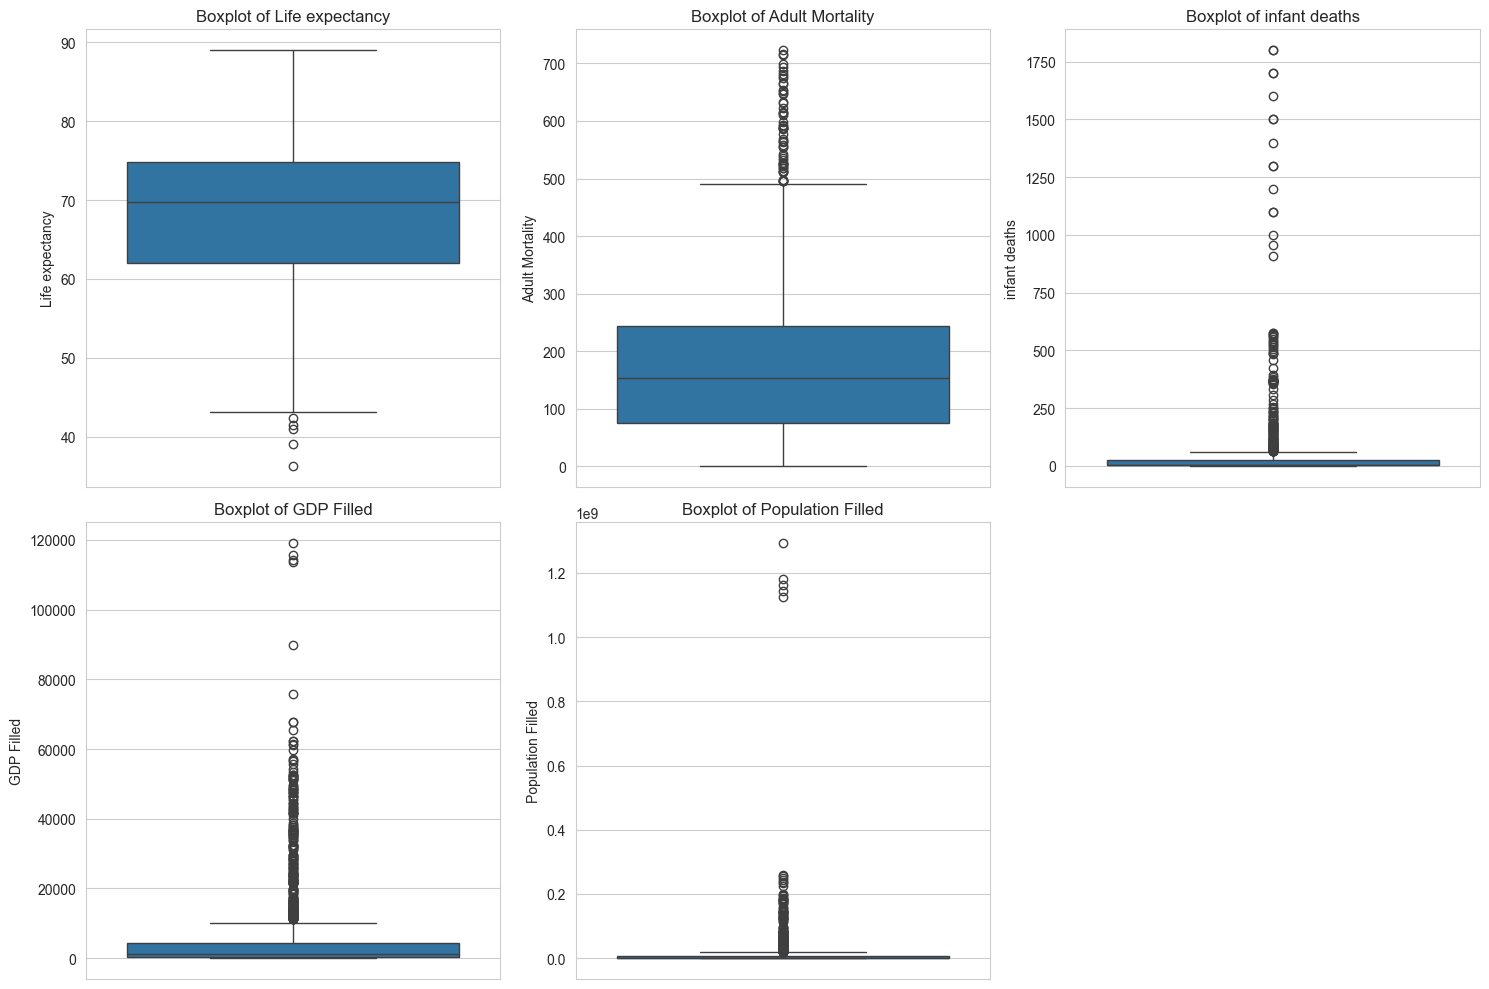

In [32]:
# Define columns with filled values
outlier_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'GDP Filled', 'Population Filled']

# Define grid size (adjust rows & cols as needed)
rows = 2
cols = 3  # Adjust based on the number of columns

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Set figure size

# Flatten axes for easy iteration
axes = axes.flatten()

# Create boxplots in a grid (Vertical orientation)
for i, col in enumerate(outlier_columns):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])  # Keep y-axis for vertical plots
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots (if the grid is larger than the number of columns)
for i in range(len(outlier_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show() 


In [33]:
df_cleaned = df_cleaned[df_cleaned['Life expectancy'] >= 40]
df_cleaned['Infant Mortality Rate'] = (df_cleaned['infant deaths'] / df_cleaned['Population Filled']) * 1000
df_cleaned['Adult Mortality_log'] = np.log(df_cleaned['Adult Mortality'] + 1)
df_cleaned['GDP_log'] = np.log(df_cleaned['GDP Filled'] + 1)

# **Data Cleaning and Outlier Handling**

## **Introduction**
To ensure accurate and meaningful analysis, we applied **specific data transformations** to handle outliers and improve data distribution. The following steps were implemented:

1. **Removing unrealistic life expectancy values**
2. **Normalizing infant mortality using a rate-based approach**
3. **Applying log transformation to skewed variables (Adult Mortality & GDP)**

These steps help **remove erroneous values**, **normalize distributions**, and **enhance statistical reliability**.

---

## **Step 1: Removing Unrealistic Life Expectancy Values**
📌 **Issue:**  
- Some observations have **life expectancy values close to 0**, which is highly **unrealistic**.  
- Historically, the lowest recorded life expectancy is around **40 years**.  

📌 **Solution:**  
- Remove rows where `Life expectancy < 40` to ensure only **valid and meaningful values** remain.  

```python
df_cleaned = df_cleaned[df_cleaned['Life expectancy'] >= 40]


# Identifying Patterns, Correlations, and Trends in Life Expectancy

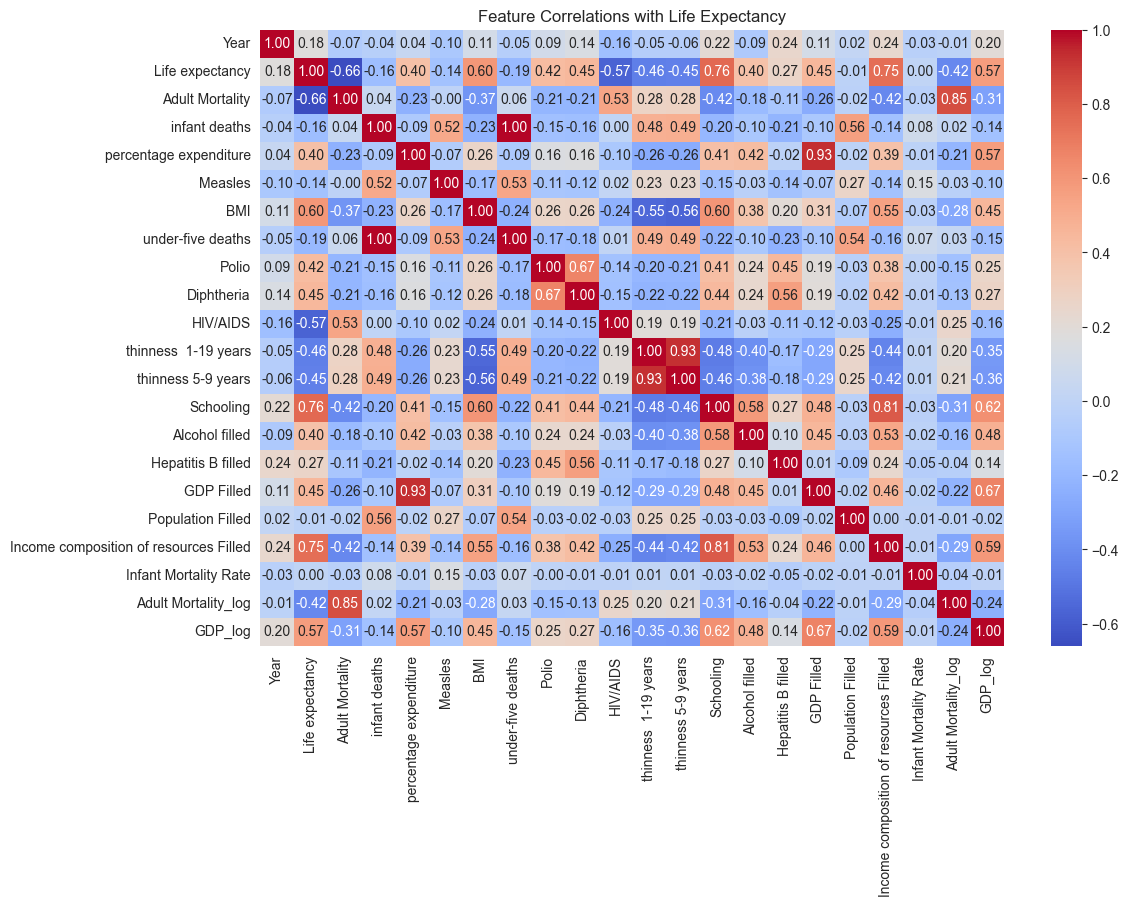

In [34]:
numeric_df = df_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Life Expectancy")
plt.show()

## Key Correlations in Life Expectancy Analysis  

### 🔹 Strong Positive Correlations  
- **Schooling (+0.76):** More years of education are strongly linked to higher life expectancy due to better health awareness, income opportunities, and living conditions.  
- **Income Composition of Resources (+0.74):** A measure of human development, indicating better access to healthcare, education, and resources.  
- **GDP (Log) (+0.57):** Wealthier nations invest more in healthcare and social services, leading to longer life spans.  

### 🔻 Strong Negative Correlations  
- **Adult Mortality (−0.66):** Higher adult mortality rates lead to lower life expectancy, reflecting poor healthcare systems.  
- **HIV/AIDS (−0.58):** Countries with high HIV prevalence tend to have significantly lower life expectancy.  
- **Infant Mortality Rate (−0.44):** High infant deaths indicate poor maternal healthcare and lower life expectancy.  

### 📌 Key Takeaways  
1. **Education is the strongest driver**—better schooling improves health and longevity.  
2. **Wealth and life expectancy are linked**, but income distribution matters.  
3. **Reducing mortality rates** (infant, adult, and disease-related) is crucial for improving life expectancy.  


In [35]:
trend_df = df_cleaned.groupby('Year')['Life expectancy'].mean().reset_index()

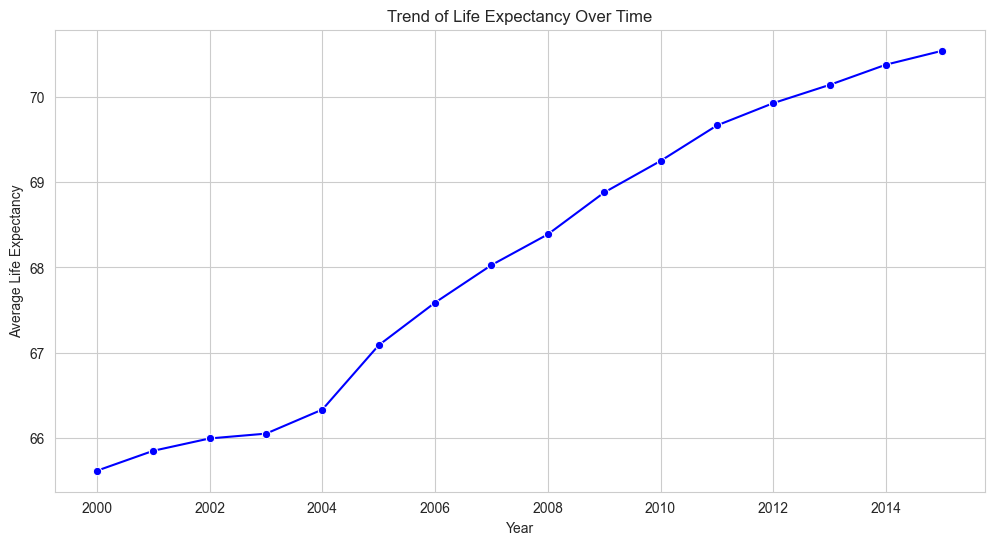

In [36]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Year', y = 'Life expectancy', data = trend_df, marker = 'o', color='b')
plt.title("Trend of Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.grid(True)
plt.show()

## Trend in Life Expectancy Over Time  

The line chart shows the trend of **life expectancy** over the years.  

### Key Observations:  
- **Gradual Increase**: There is a steady rise in life expectancy over time, indicating improvements in healthcare, living standards, and economic conditions.  
- **Dip in 2003**: A small decline is observed in **2003**, which could be linked to significant global events such as the **European heatwave**, which caused excess mortality.  
- **Recovery & Continuation**: After 2003, life expectancy resumed its upward trend, suggesting the dip was a temporary anomaly rather than a long-term decline.  


# Developed vs. Developing countries

In [37]:
life_expectancy_by_status = df_cleaned.groupby('Status')['Life expectancy'].mean().reset_index()
life_expectancy_by_status.rename(columns = {'Life expectancy': 'Avg Life expectancy'}, inplace = True)
print(life_expectancy_by_status)

       Status  Avg Life expectancy
0   Developed            78.906579
1  Developing            66.321967


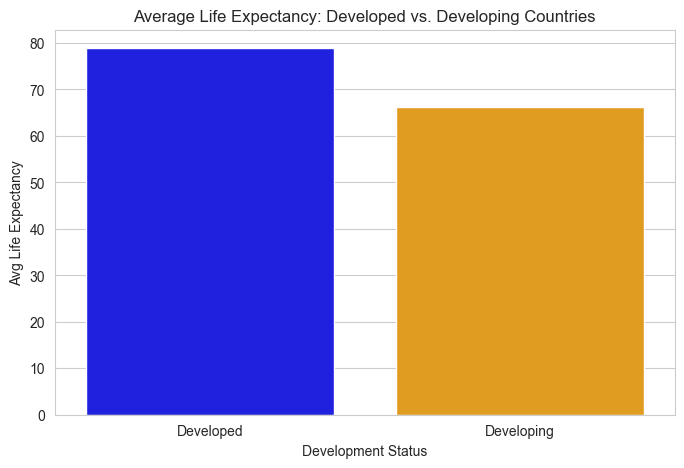

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=life_expectancy_by_status['Status'], 
            y=life_expectancy_by_status['Avg Life expectancy'],  
            palette=['blue', 'orange'])
plt.title("Average Life Expectancy: Developed vs. Developing Countries")
plt.xlabel("Development Status")
plt.ylabel("Avg Life Expectancy")
plt.show()


# Feature Importance & Modeling

In [39]:
df.isnull().sum()

Country                                     0
Year                                        0
Status                                      0
Life expectancy                             0
Adult Mortality                             0
infant deaths                               0
Alcohol                                   132
percentage expenditure                      0
Hepatitis B                               331
Measles                                     0
BMI                                        16
under-five deaths                           0
Polio                                       0
Total expenditure                         135
Diphtheria                                  0
HIV/AIDS                                    0
GDP                                        18
Population                                  4
thinness  1-19 years                       16
thinness 5-9 years                         16
Income composition of resources             0
Schooling                         

In [40]:
num_col = ['BMI', 'Total expenditure','thinness  1-19 years','thinness 5-9 years']
for i in num_col:
    df[i].fillna(df[i].median(), inplace = True)

In [41]:
print(df.isnull().sum())

Country                                     0
Year                                        0
Status                                      0
Life expectancy                             0
Adult Mortality                             0
infant deaths                               0
Alcohol                                   132
percentage expenditure                      0
Hepatitis B                               331
Measles                                     0
BMI                                         0
under-five deaths                           0
Polio                                       0
Total expenditure                           0
Diphtheria                                  0
HIV/AIDS                                    0
GDP                                        18
Population                                  4
thinness  1-19 years                        0
thinness 5-9 years                          0
Income composition of resources             0
Schooling                         

In [42]:
df_cleaned[['Life expectancy', 'Adult Mortality', 'HIV/AIDS', 'thinness  1-19 years', 'infant deaths']].corr()


,Life expectancy,Adult Mortality,HIV/AIDS,thinness 1-19 years,infant deaths
Life expectancy,1.000000,-0.659222,-0.572646,-0.461388,-0.164525
Adult Mortality,-0.659222,1.000000,0.533768,0.279314,0.043363
HIV/AIDS,-0.572646,0.533768,1.000000,0.191012,0.002995
thinness 1-19 years,-0.461388,0.279314,0.191012,1.000000,0.484406
infant deaths,-0.164525,0.043363,0.002995,0.484406,1.000000


### Before calculating VIF, we analyze the correlation between selected features. High correlation (above 0.8 or below -0.8) can indicate redundancy.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_features = [
    'Life expectancy', 'Adult Mortality_log', 'HIV/AIDS', 'thinness  1-19 years',
    'Infant Mortality Rate', 'Income composition of resources Filled', 'GDP_log'
]

X = df_cleaned[selected_features]

X = X.replace([np.inf, -np.inf], np.nan).dropna()

vif_data = pd.DataFrame()

vif_data["Feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                  Feature        VIF
0                         Life expectancy  63.896836
1                     Adult Mortality_log  17.696195
2                                HIV/AIDS   1.491496
3                    thinness  1-19 years   2.558917
4                   Infant Mortality Rate   1.004293
5  Income composition of resources Filled  24.139827
6                                 GDP_log  28.556925


In [50]:
selected_features = [
    'Adult Mortality_log', 'HIV/AIDS', 'thinness  1-19 years',
    'Infant Mortality Rate', 'Income composition of resources Filled', 'GDP_log'
]

#### We define a list of features that will be checked for multicollinearity.
#### Why These Features?
#### - These features are known to impact life expectancy based on prior research.
#### - Includes both health-related and economic indicators.

In [51]:
selected_features.remove('Income composition of resources Filled')
X = df_cleaned[selected_features]
X = X.replace([np.inf, -np.inf], np.nan).dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 Feature        VIF
0    Adult Mortality_log  11.419389
1               HIV/AIDS   1.247105
2   thinness  1-19 years   2.372522
3  Infant Mortality Rate   1.002444
4                GDP_log   8.624871


In [52]:
selected_features.remove('Adult Mortality_log')
df_cleaned['GDP_log2'] = np.log(df_cleaned['GDP_log'] + 1)
X = df_cleaned[selected_features]
X = X.replace([np.inf, -np.inf], np.nan).dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 Feature       VIF
0               HIV/AIDS  1.174463
1   thinness  1-19 years  1.874375
2  Infant Mortality Rate  1.001888
3                GDP_log  1.767217


#### Step 1: Remove Highly Correlated Features  
We removed **Income composition of resources Filled** because it had a high VIF, indicating it was highly correlated with other predictors. This helps reduce redundancy and improves model stability.  

#### Step 2: Recalculate VIF  
After removing **Income composition of resources Filled**, we recalculated the VIF for the remaining features to check for multicollinearity. This ensures that the remaining predictors are independent and reliable.  

#### Step 3: Remove Another Correlated Feature  
We removed **Adult Mortality_log** because it still had a high VIF, indicating it was correlated with other predictors. This step further reduces multicollinearity and improves model interpretability.  

#### Step 4: Transform GDP_log  
We applied a second log transformation to **GDP_log** to reduce skewness and further lower its VIF. This transformation helps stabilize the variance and makes the data more suitable for modeling.  

#### Step 5: Final VIF Check  
After these adjustments, we recalculated the VIF for the final set of features. The results showed that all VIFs were below **2**, indicating no significant multicollinearity. This ensures that the model will be stable and interpretable.  


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

selected_features = [
    'HIV/AIDS', 'thinness  1-19 years', 'Infant Mortality Rate', 
    'GDP_log', 'BMI_Schooling'
]

# Prepare feature matrix (X) and target variable (y)
X = df_cleaned[selected_features]
y = df_cleaned['Life expectancy']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 5.20
R² Score: 0.7118


# Insights & Recommendations for Policymakers

## Model Performance  
- **R² Score:** 0.71  
- **RMSE:** 5.20  
- Our model identifies key factors affecting life expectancy, highlighting the importance of healthcare, nutrition, education, and economic growth.

---

## Key Insights from the Model  

### **1. HIV/AIDS**  
- **Impact:** Strongest negative effect on life expectancy (**coefficient = -4.01**).  
- **Why:** High HIV/AIDS prevalence drastically reduces life expectancy, especially in **Sub-Saharan Africa**.  

### **2. Thinness 1-19 Years**  
- **Impact:** Malnutrition in adolescents reduces life expectancy (**coefficient = -0.31**).  
- **Why:** Poor nutrition during adolescence leads to long-term health complications.  

### **3. GDP_log**  
- **Impact:** Higher GDP correlates with longer life expectancy (**positive effect through interaction terms**).  
- **Why:** Economic growth enables better healthcare, education, and infrastructure.  

### **4. BMI_Schooling Interaction**  
- **Impact:** Combines **nutrition (BMI)** and **education (Schooling)** for a **positive effect** (**coefficient = 1.43**).  
- **Why:** Educated populations with better nutrition make healthier choices.  

---

## Actionable Policy Recommendations  

### **1. Combat HIV/AIDS Epidemic**  
- **Policy:** Scale up **antiretroviral therapy (ART)** and preventive measures (**PrEP, condom distribution**).  
- **Target:** Focus on high-burden regions (**e.g., Sub-Saharan Africa**).  
- **Funding:** Allocate international aid (**PEPFAR, Global Fund**) to HIV/AIDS programs.  

### **2. Address Adolescent Malnutrition**  
- **Policy:** Implement **school meal programs** and **subsidize nutrient-rich foods** for low-income families.  
- **Target:** Countries with high malnutrition rates (**e.g., Yemen, South Sudan**).  
- **Partnerships:** Collaborate with **NGOs like UNICEF, WFP** for food distribution.  

### **3. Boost Economic Growth (GDP)**  
- **Policy:** Invest in **infrastructure (roads, hospitals)** and **small-business loans** to stimulate local economies.  
- **Target:** Developing countries with low GDP (**e.g., Nepal, Haiti**).  
- **Incentives:** Offer **tax breaks for foreign investments** in healthcare and education sectors.  

### **4. Integrate Education and Nutrition**  
- **Policy:** Combine **nutrition education** with school curricula and provide **free micronutrient supplements**.  
- **Example:** **"Healthy Schools Initiative"** – Teach students about balanced diets while offering fortified meals.  

### **5. Improve Healthcare Access**  
- **Policy:** Build **rural healthcare clinics** and **train community health workers**.  
- **Target:** Regions with high infant mortality rates (**e.g., Sub-Saharan Africa, South Asia**).  
- **Technology:** Use **mobile health (mHealth) apps** for remote consultations.  

---

## **Prioritization for Lower Life Expectancy Countries**  

### **Immediate Actions:**  
✅ **HIV/AIDS treatment and prevention**.  
✅ **Emergency food aid** for malnutrition hotspots.  

### **Medium-Term Goals:**  
✔️ Economic stimulus through **job creation and infrastructure development**.  
✔️ **School-based nutrition programs** for malnourished children.  

### **Long-Term Goals:**  
⭐ Universal **healthcare systems**.  
⭐ **Education reforms** to improve literacy and health awareness.  